In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [66]:
df = pd.read_excel("final_data.xlsx")
df

data = pd.DataFrame(df)
data

,input1,decimal1,input2,decimal2,product of numbers,product in binary,POWER in MICROWATTS( E-06)
0,0,0,0,0,0,0,4.090
1,0,0,1,1,0,0,4.161
2,0,0,10,2,0,0,4.161
3,0,0,11,3,0,0,4.227
4,0,0,100,4,0,0,4.161
...,...,...,...,...,...,...,...
251,1111,15,1011,11,165,10100101,3.530
252,1111,15,1100,12,180,10110100,3.760
253,1111,15,1101,13,195,11000011,3.380
254,1111,15,1110,14,210,11010010,3.500


In [67]:

data.rename(columns={"product in decimal":"product in binary"},inplace = True)


In [68]:
#features = ["input1","decimal1","input2","decimal2","product of numbers","product in binary","dec1^(2) * dec2","dec1 * dec2^(2)"]

x = data.drop(columns=["POWER in MICROWATTS( E-06)"],axis =1)
y = data["POWER in MICROWATTS( E-06)"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

the evaluation using linear regression is: 

the predicted power values are:[4.21578 3.98228 4.02447 4.0181  3.9535  3.79105 4.06755 3.86576 3.75505
 3.86943 3.896   4.2502  3.87803 3.82817 3.85432 3.78976 3.8253  3.87649
 3.90459 4.25196 3.59916 3.57621 3.70124 4.28225 3.55432] 

MAE scores for each fold: [0.09422576923076843, 0.081784615384615, 0.08219961538461598, 0.08316807692307729, 0.11084730769230736, 0.08061653846153885, 0.08170999999999978, 0.07537280000000102, 0.07738000000000042, 0.06574199999999993] 
Average MAE: 0.08330467230769241 



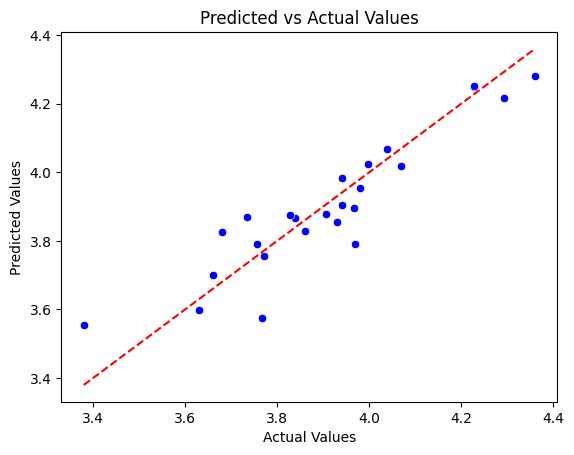

the evaluation using randomforest_regressor is:
the predicted power values are:[4.21578 3.98228 4.02447 4.0181  3.9535  3.79105 4.06755 3.86576 3.75505
 3.86943 3.896   4.2502  3.87803 3.82817 3.85432 3.78976 3.8253  3.87649
 3.90459 4.25196 3.59916 3.57621 3.70124 4.28225 3.55432] 

MAE scores for each fold: [0.09422576923076843, 0.081784615384615, 0.08219961538461598, 0.08316807692307729, 0.11084730769230736, 0.08061653846153885, 0.08170999999999978, 0.07537280000000102, 0.07738000000000042, 0.06574199999999993, 0.03919384615384631, 0.029056153846154367, 0.026638076923077538, 0.03011346153846113, 0.03625653846153908, 0.031436923076923244, 0.029765599999999583, 0.027867600000000402, 0.03033359999999998, 0.06574199999999993] 
Average MAE: 0.058972526153846294 



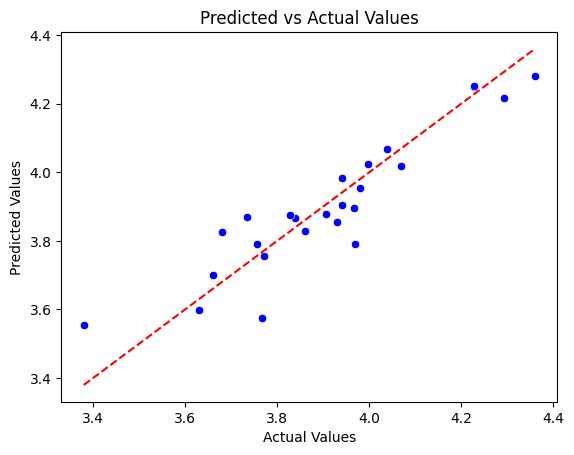

In [69]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
# using kfold cross validation 

kf = KFold(n_splits=10, shuffle=True, random_state=256)
maes = []
def model_evaluation(modelname,x_train,x_test,y_train,y_test):

    for train_index, test_index in kf.split(x):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        modelname.fit(X_train, y_train)

        y_pred2 = model2.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred2)
        maes.append(mae)

    print(f"the predicted power values are:{y_pred2} \n")
    #print(pd.DataFrame(y_pred2),"\n")
    
    print(f"MAE scores for each fold: {maes} ")
    print(f"Average MAE: {np.mean(maes)} \n")

   

    # Assuming `y_test` and `y_pred` are your actual and predicted values
    sns.scatterplot(x=y_test, y=y_pred2, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal fit line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Actual Values')
    plt.show()



model1 = LinearRegression()

model2 = RandomForestRegressor(random_state=42)

print("the evaluation using linear regression is: \n")
model_evaluation(model2,x_train,x_test,y_train,y_test)

print("the evaluation using randomforest_regressor is:")
model_evaluation(model1,x_train,x_test,y_train,y_test)



